###Import libraries and data

In [2]:
# Import libraries
!pip install imojify
from imojify import imojify
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

!pip install nltk
!pip install stop_words
!pip install emoji
!pip install vaderSentiment
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words
from nltk.tokenize.treebank import TreebankWordDetokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
# Reimport emoji data
emojis_df = pd.read_csv('/content/gdrive/MyDrive/emojis_df.csv')
emojis_df['unicode'] = emojis_df['unicode'].str.upper()

### Depressed tweet emojis

In [4]:
# Get most frequent emojis for depressed tweets
emojis_depressed = emojis_df[emojis_df['depressed']==1]
n = 20
top_emojis_depressed = emojis_depressed['emoji'].value_counts()[:n].index.tolist()

# Replace \U0001f979 w/U0001F97A
emojis_depressed['unicode'] = emojis_depressed.apply(lambda row: (row['unicode']).replace("U0001F979", "U0001F97A"), axis=1)
counter = 0
for index, row in emojis_depressed.iterrows():
  if row['unicode'] == "\\U0001F97A":
    emojis_depressed.iloc[index,4] = "🥺"
# Remove irrelevant unicodes/emojis, such as skin color
emojis_depressed = emojis_depressed[emojis_depressed["demoji"].str.contains("skin_tone")==False] #Remove rows that ends with skin tone

#Subset the data down to the top 20 depressed tweets
for index, row in emojis_depressed.iterrows():
  if row['emoji'] not in top_emojis_depressed:
    emojis_depressed.drop(index, inplace=True)
emojis_depressed.head()

<ipython-input-4-e4d9a72e2f8d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emojis_depressed['unicode'] = emojis_depressed.apply(lambda row: (row['unicode']).replace("U0001F979", "U0001F97A"), axis=1)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Unnamed: 0,unicode,id,depressed,emoji,demoji
0,0,\U0001F629,1624155372029108236,1,😩,weary_face
1,1,\U0001F614,1624154617012527104,1,😔,pensive_face
2,2,\U0001F62D,1624154382047535111,1,😭,loudly_crying_face
3,3,\U0001F62D,1624154382047535111,1,😭,loudly_crying_face
4,4,\U0001F62D,1624154382047535111,1,😭,loudly_crying_face


In [5]:
top_emojis_depressed = emojis_depressed['emoji'].value_counts()[:15].index.tolist()
print(emojis_depressed['emoji'].value_counts()[:15])
top_emojis_depressed = [emoji.replace('\U0001f972',"🥲") for emoji in top_emojis_depressed]
print(top_emojis_depressed)

😭    138
😂     49
🔹     36
🤣     27
💀     27
😩     26
🥲     25
🙃     24
😔     19
😅     19
🤦     17
🤷     16
🙏     15
🫠     14
😌     12
Name: emoji, dtype: int64
['😭', '😂', '🔹', '🤣', '💀', '😩', '\U0001f972', '🙃', '😔', '😅', '🤦', '🤷', '🙏', '\U0001fae0', '😌']


### Random Tweet Emojis

In [6]:
# Get most frequent emojis for random tweets
emojis_random = emojis_df[emojis_df['depressed']==0]
top_emojis_random = emojis_random['emoji'].value_counts()[:n].index.tolist()

# Replace \U0001f979 w/U0001F97A
emojis_random["unicode"] = emojis_random["unicode"].replace("\\\\U0001f979", "\\\\U0001F97A") #Remove rows that ends with skin tone

# Remove irrelevant unicodes/emojis, such as skin color
emojis_random = emojis_random[emojis_random["demoji"].str.contains("skin_tone")==False] #Remove rows that ends with skin tone

#Replace unicode for holding back tears

# Subset the data down to the top 20 random tweets
for index, row in emojis_random.iterrows():
  if row['emoji'] not in top_emojis_random:
    emojis_random.drop(index, inplace=True)

emojis_random.head()

<ipython-input-6-ddeada173d80>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emojis_random["unicode"] = emojis_random["unicode"].replace("\\\\U0001f979", "\\\\U0001F97A") #Remove rows that ends with skin tone


,Unnamed: 0,unicode,id,depressed,emoji,demoji
983,983,\U0001F602,1624155863391797248,0,😂,face_with_tears_of_joy
987,987,\U0001F62D,1624155863068860435,0,😭,loudly_crying_face
988,988,\U0001F62D,1624155863068860435,0,😭,loudly_crying_face
989,989,\U0001F539,1624155862884397065,0,🔹,small_blue_diamond
990,990,\U0001F539,1624155862884397065,0,🔹,small_blue_diamond


In [7]:
top_emojis_random = emojis_random['emoji'].value_counts()[:15].index.tolist()
print(emojis_random['emoji'].value_counts()[:15])
print(top_emojis_random)

🔹    234
😭    129
😂    124
𝙤     44
🟩     41
𝙩     40
🔥     39
🤣     38
𝙧     36
💔     33
🏳     33
🌈     33
𝙪     28
𝙨     28
𝙣     24
Name: emoji, dtype: int64
['🔹', '😭', '😂', '𝙤', '🟩', '𝙩', '🔥', '🤣', '𝙧', '💔', '🏳', '🌈', '𝙪', '𝙨', '𝙣']


# Data Visualizations

## Most frequent emojis

In [8]:
#Function that adds emoji image to barplot
def offset_img(cords, emoji, ax):
    image = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(image, zoom=0.08)
    im.image.axes = ax
    ab = AnnotationBbox(im, (cords[0], cords[1]),  frameon=False, pad=0)
    ax.add_artist(ab)

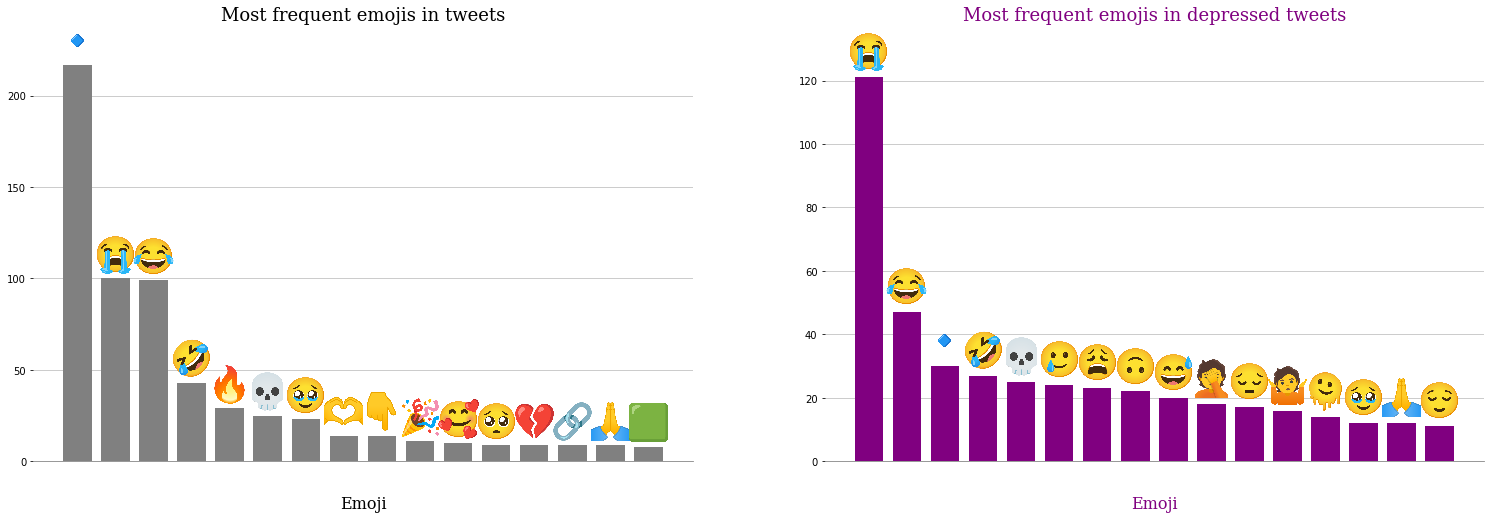

In [9]:
emojis_depressed = ['😭', '😂', '🔹', '🤣', '💀', '\U0001f972', '😩', '🙃', '😅', '🤦', '😔', '🤷', '\U0001fae0', '\U0001f979', '🙏', '😌']
values_depressed = [121, 47, 30, 27,25,24,23,22,20,18,17,16,14,12,12,11]

emojis_random = ['🔹', '😭', '😂', '🤣', '🔥', '💀', '\U0001f979', '\U0001faf6', '👇', '🎉', '🥰', '🥺', '💔', '🔗', '🙏', '🟩']
values_random =[217, 100, 99, 43, 29, 25, 23, 14, 14, 11, 10, 9, 9, 9, 9, 8]

# Add bars
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(26, 8))
ax.bar(range(len(emojis_random)), values_random, width=0.75, align="center", color = 'Grey')
ax.set_xticks(range(len(emojis_random)))
ax.tick_params(bottom = False)
ax.set_xticklabels([])
ax.tick_params(axis='x', which='major', pad=26)
ax.set_ylim((0, ax.get_ylim()[1]+10))

# Add labels
ax.set_xlabel('Emoji', color='Black', fontsize = 16, fontname="serif")
ax.set_title('Most frequent emojis in tweets', color='Black', fontsize = 18, fontname="serif")

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('Grey')

# Add a horizontal grid
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='Silver')
ax.xaxis.grid(False)

for i, e in enumerate(emojis_random):
  offset_img([i,values_random[i]+13], e, ax)


# Add bars
ax2.bar(range(len(emojis_depressed)), values_depressed, width=0.75, align="center", color = 'purple')
ax2.set_xticks(range(len(emojis_depressed)))
ax2.tick_params(bottom = False)
ax2.set_xticklabels([])
ax2.tick_params(axis='x', which='major', pad=26)
ax2.set_ylim((0, ax2.get_ylim()[1]+10))

# Add labels
ax2.set_xlabel('Emoji', color='Purple', fontsize = 16, fontname="serif")
ax2.set_title('Most frequent emojis in depressed tweets', color='Purple', fontsize = 18, fontname="serif")

# Remove borders
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('Grey')

# Add a horizontal grid
ax2.set_axisbelow(True)
ax2.yaxis.grid(True, color='Silver')
ax2.xaxis.grid(False)

for i, e in enumerate(emojis_depressed):
  offset_img([i,values_depressed[i]+8], e, ax2)

plt.savefig('emojis_bar_graph.png')

*Based on the figure above, the depressed tweets are more closely associated with the crying face, upside down face, melting face, weary face, and pensive face, whereas the  normal tweets are more closely tied to the blue diamond, fire sign, heart hands, and smiling face with hearts. While the crying face is popular among both not depresed and depressed tweets, the crying face is proportionally more popular among depressed tweets. It is also worth noting that the positive emojis that are common in depressed tweets are likely to be used ironically. Overall, there are more negative emoji expressions for the depressed tweets, whereas the ordinary tweets tend to have more neutral emotions.*

Sentiment Analysis 

In [10]:
# Import twitter data
df3 = pd.read_csv('/content/gdrive/MyDrive/depressed_tweets.csv')
non_depressed = pd.read_csv('/content/gdrive/MyDrive/non_depressed.csv')
rdf2 = pd.read_csv('/content/gdrive/MyDrive/random_tweets.csv')

# Append datasets
rdf2 = rdf2[0:len(df3)-len(non_depressed)] # remove some tweets to balance data
non_depressed_tweets = rdf2[['tweet', 'depressed']].append(non_depressed[['tweet', 'depressed']])
tweets_df = df3[['tweet', 'depressed']].append(non_depressed_tweets)

# Remove punctuation
tweets_df["tweet"] = tweets_df['tweet'].str.replace('[^\w\s]|[0-9]','')
tweets_df.head()

# Tokenization #
tweets_df['tweet'] = tweets_df.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)

# Stem words
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatized_tweets = []
for tweet in tweets_df['tweet']:
  lemmatized_tweet = []
  for word in tweet:
    lemmatized_word = lemmatizer.lemmatize(word)
    lemmatized_tweet.append(lemmatized_word)
  lemmatized_tweets.append(lemmatized_tweet)
tweets_df['tweet'] = lemmatized_tweets

## Stopwords ##
stop_words = list(get_stop_words('en'))
nltk_stop_words = list(stopwords.words('english'))
stop_words.extend(nltk_stop_words)

# Remove stop words
sentences_list = []
for word_list in tweets_df['tweet']:
  filtered_sentence = []
  for word in word_list:
    if word not in stop_words:
      filtered_sentence.append(word)
  sentences_list.append(filtered_sentence)
tweets_df['tweet'] = sentences_list

# Convert tweets back into text 
detokenized_tweets = []
for tweet in tweets_df.tweet:
  detokenized_tweets.append(TreebankWordDetokenizer().detokenize(tweet))
tweets_df['text'] = detokenized_tweets

x = tweets_df['text'].to_list()
y = tweets_df['depressed'].to_list()

analyzer = SentimentIntensityAnalyzer() # Instantiate sentiment
tweets_df['sentiment_score'] = tweets_df['text'].apply(analyzer.polarity_scores)
tweets_df = pd.concat([tweets_df.drop(['sentiment_score'], axis=1), tweets_df['sentiment_score'].apply(pd.Series)], axis=1)
tweets_df['compound'] = round(tweets_df['compound'], 2)

# Get the average sentiment scores by tweet classification
tweets_df.groupby(['depressed']).mean('compound')

<ipython-input-10-e560249d0e44>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df["tweet"] = tweets_df['tweet'].str.replace('[^\w\s]|[0-9]','')


,neg,neu,pos,compound
depressed,,,,
0,0.125330,0.677113,0.197557,0.093306
1,0.286065,0.547925,0.166016,-0.146019


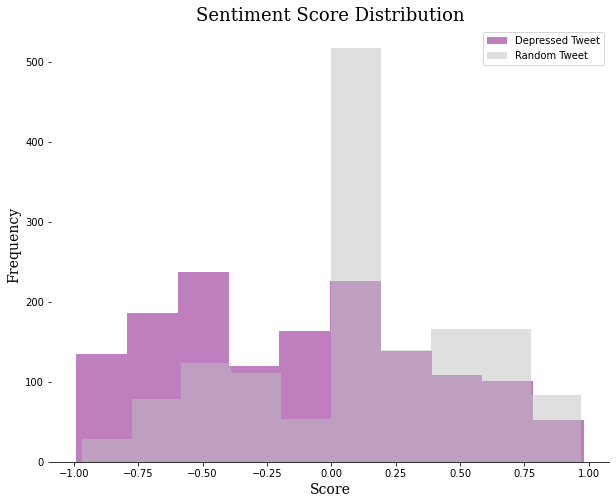

In [11]:
# define points values by group
depressed = tweets_df.loc[tweets_df['depressed'] == 1, 'compound']
not_depressed = tweets_df.loc[tweets_df['depressed'] == 0, 'compound']

# add three histograms to one plot
fig = plt.subplots(figsize=(10, 8))
plt.hist(depressed, alpha=0.5, label='Depressed Tweet', color = "purple")
plt.hist(not_depressed, alpha=0.5, label='Random Tweet', color = "silver")

# add plot title and axis labels
plt.title('Sentiment Score Distribution', fontsize = 18, fontname="serif")
plt.xlabel('Score', fontsize = 14, fontname="serif")
plt.ylabel('Frequency', fontsize = 14, fontname="serif")

# Remove borders
import seaborn as sns
sns.despine(left=True)

# add legend
plt.legend(title='')

# Export as png
plt.savefig('sentiment_distribution.png')

# display plot
plt.show()

*The difference in the average composite vader score between depressed and not depressed tweets is 0.24, with the average vader score for depressed tweets being significantly more negative. Furthermore, the score distribution above shows that although there is not a drastic difference in the number positive vader score between depressed and not depressed tweets, there is a noticeablly larger number of depressed tweets with a lower (composite) score than not depressed tweets with a lower score.*

###Wordcloud

In [12]:
tweets_df.loc[tweets_df['depressed'] == 1].head()

,tweet,depressed,text,neg,neu,pos,compound
0,"[working, home, today, depressed, making, corp...",1,working home today depressed making corporate ...,0.190,0.690,0.121,-0.30
1,"[feeling, depressed, like, need, one, night, g...",1,feeling depressed like need one night go skin,0.268,0.407,0.325,-0.08
2,"[think, depressed, even, excited, antman, anym...",1,think depressed even excited antman anymore,0.340,0.412,0.247,-0.23
3,"[fucking, extrovert, get, horribly, depressed,...",1,fucking extrovert get horribly depressed regul...,0.629,0.371,0.000,-0.82
4,"[severely, depressed, think, thing, help, curr...",1,severely depressed think thing help current st...,0.371,0.471,0.159,-0.56


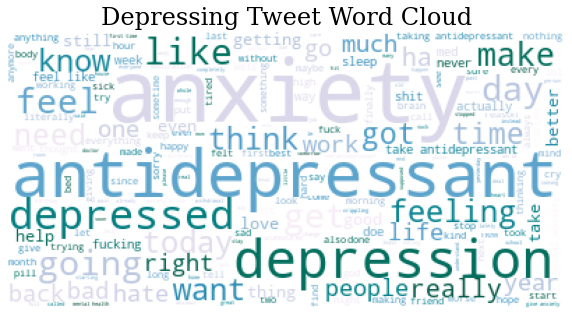

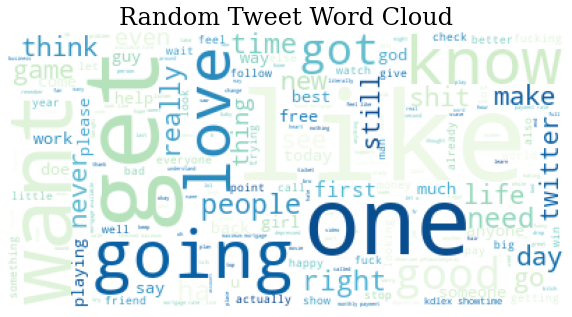

In [13]:
from wordcloud import WordCloud
fig = plt.subplots(figsize=(10, 8))
depressed_wordcloud = WordCloud(stopwords = ['wa'], 
                       background_color = "white",
                       colormap='PuBuGn').generate(' '.join(tweets_df.loc[tweets_df['depressed'] == 1]['text']))
plt.imshow(depressed_wordcloud)
plt.title("Depressing Tweet Word Cloud", fontsize = 24, fontname="serif")
plt.axis("off")
plt.savefig('depressed_wordcloud.png')
plt.show()

random_wordcloud = WordCloud(stopwords = ['wa'], 
                       background_color = "white",
                       colormap='GnBu').generate(' '.join(tweets_df.loc[tweets_df['depressed'] == 0]['text']))
fig = plt.subplots(figsize=(10, 8))
plt.imshow(random_wordcloud)
plt.title("Random Tweet Word Cloud", fontsize = 24, fontname="serif")
plt.axis("off")
plt.savefig('not_depressed_wordcloud.png')
plt.show()

*Both wordclouds contain everyday conversational words, such as "like", "going", "got", and "really". In the wordcloud of tweets that may show symptoms of depression, the key words such as depression, antidepressants, anxiety, and feel, are much more frequent, which is expected. The wordcloud also contains words with a negative connotation, such as "hate", or time words, such as "day", "today", "time", "life", "bad", "work", "help", etc.*

### Most Significant Features (excluding depression keywords)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


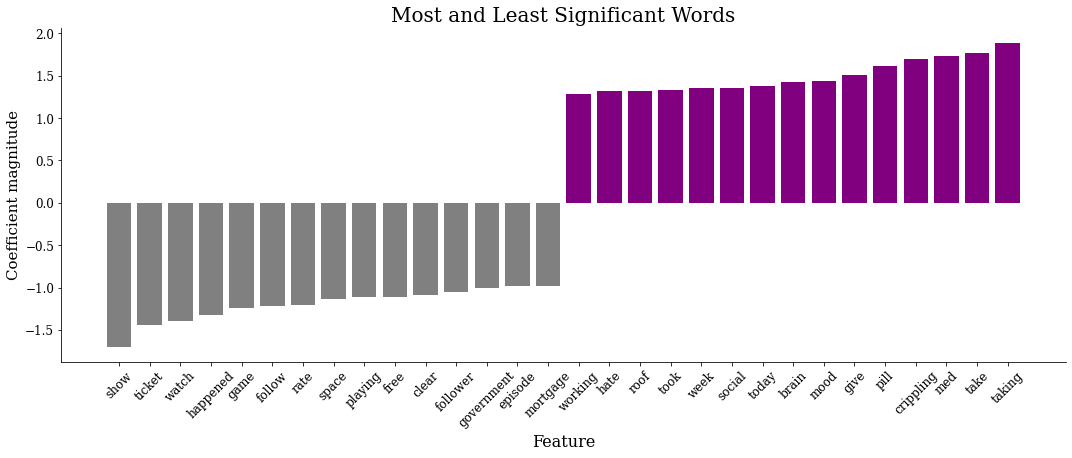

In [14]:
 # Include depressed key words into stopwords
stop_words = ['feel', "like", 'depressed', 'depression', 'anxiety', 'antidepressant', 'antidepressants', 'feeling', 'felt'] #We used these words to search for tweets, thus we end up removing tweets
stop_words2 = list(get_stop_words('en'))
stop_words.extend(stop_words2)
nltk_stop_words = list(stopwords.words('english'))
stop_words.extend(nltk_stop_words)

# Remove stop words
sentences_list = []
for word_list in tweets_df['tweet']:
  filtered_sentence = []
  for word in word_list:
    if word not in stop_words:
      filtered_sentence.append(word)
  sentences_list.append(filtered_sentence)
tweets_df['tweet'] = sentences_list

# Convert tweets back into text 
detokenized_tweets = []
for tweet in tweets_df.tweet:
  detokenized_tweets.append(TreebankWordDetokenizer().detokenize(tweet))
tweets_df['text'] = detokenized_tweets

# Function that visualizes coefficients from a linear model
# Parameters: array of model coefficients, feature names for labels, and integer of top number of features to show
import numpy as np
def visualize_coefficients(coefficients, feature_names, top_features):
    coefficients = coefficients.squeeze()

    # Get coefficients from large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-top_features:]
    negative_coefficients = np.argsort(coef)[:top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # Plot coefficients
    plt.figure(figsize=(18, 8))
    colors = ['Grey' if c < 0 else 'Purple'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(0, 2 * top_features),
               feature_names[interesting_coefficients], 
               rotation=45,
               ha="center")
    # Format and label
    plt.ylabel("Coefficient magnitude", fontsize = 15, fontname="serif")
    plt.xlabel("Feature", fontsize = 16, fontname="serif")
    plt.title("Most and Least Significant Words", fontsize = 20, fontname="serif")
    plt.yticks(fontsize=12, fontname="serif")
    plt.xticks(fontsize=12, fontname="serif")
    sns.despine(right = True, top = True)
    plt.savefig('features.png')

#Visualization of features/words
coefs = LogisticRegression().fit(CountVectorizer().fit_transform(tweets_df['text']), tweets_df['depressed']).coef_

vectorizer = CountVectorizer().fit(tweets_df['text'])
feature_names = vectorizer.get_feature_names() #Get feature names

visualize_coefficients(coefs, feature_names, top_features=15)

*When filtering out the depressed keywords entered in the Tweepy query to find tweets indicating depression, we notice that words relating to medicine, such as "pill" and "med" are strongly indicate depression, as well as words associated with mood ("brain" and "hate") or time words ("week" and "today").*

###Model Performance

In [15]:
# Create columns for label, word embedding, and model type
model = ['Logistic - Bag of Words', 'Logistic - TF-IDF', 'Logistic - GloVe', 'SVM - Bag of Words', 'SVM - TF-IDF', 'SVM - GloVe', 'Neural Net - Keras',  'Neural Net (3 Hidden Layers) - Keras', 'Neural Net - BERT']
embedding = ['count vectorizer', 'TF-IDF', 'GloVe', 'count vectorizer', 'TF-IDF', 'GloVe', 'Keras', 'Keras', 'BERT']
model_type = ['Logistic', 'Logistic', 'Logistic', 'SVM', 'SVM', 'SVM', 'Neural Net',  'Neural Net (3 Hidden Layers)', 'Neural Net']

In [16]:
# Create a dataframe containing model info and precision score
precision_score = [0.74, 0.80, 0.55, 0.76, 0.78, 0.56, 0.89, 0.90, 0.68]
precision_scores = pd.DataFrame({'model': model, 
                   'embedding': embedding,
                   'model_type': model_type,
                   'score': precision_score})
precision_scores.sort_values('score', inplace=True, ascending = False)
precision_scores

,model,embedding,model_type,score
7,Neural Net (3 Hidden Layers) - Keras,Keras,Neural Net (3 Hidden Layers),0.90
6,Neural Net - Keras,Keras,Neural Net,0.89
1,Logistic - TF-IDF,TF-IDF,Logistic,0.80
4,SVM - TF-IDF,TF-IDF,SVM,0.78
3,SVM - Bag of Words,count vectorizer,SVM,0.76
0,Logistic - Bag of Words,count vectorizer,Logistic,0.74
8,Neural Net - BERT,BERT,Neural Net,0.68
5,SVM - GloVe,GloVe,SVM,0.56
2,Logistic - GloVe,GloVe,Logistic,0.55


In [17]:
# Create a dataframe of recall scores
recall_score = [0.75, 0.72, 0.50, 0.70, 0.76, 0.50, 0.77, 0.81, 0.70]
recall_scores = pd.DataFrame({'model': model, 
                   'embedding': embedding,
                   'model_type': model_type,
                   'score': recall_score})
recall_scores.sort_values('score', inplace=True, ascending = False)
recall_scores

,model,embedding,model_type,score
7,Neural Net (3 Hidden Layers) - Keras,Keras,Neural Net (3 Hidden Layers),0.81
6,Neural Net - Keras,Keras,Neural Net,0.77
4,SVM - TF-IDF,TF-IDF,SVM,0.76
0,Logistic - Bag of Words,count vectorizer,Logistic,0.75
1,Logistic - TF-IDF,TF-IDF,Logistic,0.72
3,SVM - Bag of Words,count vectorizer,SVM,0.70
8,Neural Net - BERT,BERT,Neural Net,0.70
2,Logistic - GloVe,GloVe,Logistic,0.50
5,SVM - GloVe,GloVe,SVM,0.50


In [18]:
# Create a dataframe of accuracy scores
accuracy_score = [0.74, 0.77, 0.55, 0.74, 0.76, 0.55, 0.84, 0.86, 0.68]
accuracy_scores = pd.DataFrame({'model': model, 
                   'embedding': embedding,
                   'model_type': model_type,
                   'score': accuracy_score})
accuracy_scores.sort_values('score', inplace=True, ascending = False)
accuracy_scores

,model,embedding,model_type,score
7,Neural Net (3 Hidden Layers) - Keras,Keras,Neural Net (3 Hidden Layers),0.86
6,Neural Net - Keras,Keras,Neural Net,0.84
1,Logistic - TF-IDF,TF-IDF,Logistic,0.77
4,SVM - TF-IDF,TF-IDF,SVM,0.76
0,Logistic - Bag of Words,count vectorizer,Logistic,0.74
3,SVM - Bag of Words,count vectorizer,SVM,0.74
8,Neural Net - BERT,BERT,Neural Net,0.68
2,Logistic - GloVe,GloVe,Logistic,0.55
5,SVM - GloVe,GloVe,SVM,0.55


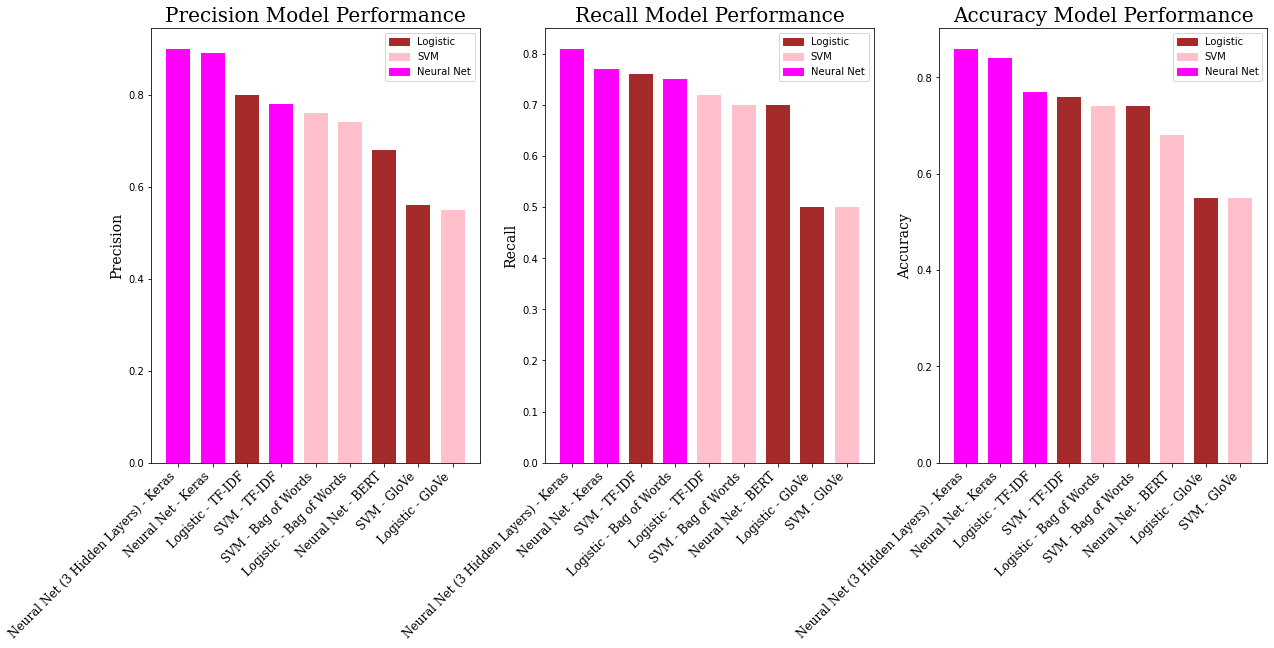

In [21]:
import matplotlib.patches as mpatches
fig, (ax2, ax3, ax1) = plt.subplots(1,3, figsize=(20,8))
# Precision Plot #
ax2.bar(precision_scores['model'], 
              precision_scores['score'], 
              color = ['magenta','magenta','brown', "magenta", "pink", 'pink', "brown", "brown", "pink"], 
              width=0.7)
ax2.set_title('Precision Model Performance',
              fontsize = 20,
              fontname="serif")
ax2.set_ylabel('Precision',
               fontsize=14,
               fontname = 'serif')
ax2.set_xticklabels(precision_scores['model'], 
           rotation = 45,
           ha="right",
           fontsize=12,
           fontname = 'serif')
# Manually create legend
log = mpatches.Patch(color='brown', 
                     label='Logistic')
svm = mpatches.Patch(color='pink', 
                     label='SVM')
nn = mpatches.Patch(color='magenta', 
                    label='Neural Net')
ax2.legend(handles=[log, svm, nn])

# Recall Plot #
ax3.bar(recall_scores['model'], 
              recall_scores['score'], 
              color = ['magenta','magenta','brown', "magenta", "pink", 'pink', "brown", "brown", "pink"], 
              width=0.7)
ax3.set_title('Recall Model Performance',
              fontsize = 20,
              fontname="serif")
ax3.set_ylabel('Recall',
               fontsize=14,
               fontname = 'serif')
ax3.set_xticklabels(recall_scores['model'], 
           rotation = 45,
           ha="right",
           fontsize=12,
           fontname = 'serif')

ax3.legend(handles=[log, svm, nn])

# Accuracy Plot #
colors = ['magenta','magenta','magenta', "brown", "pink", 'brown', "pink", "brown", "pink"]
ax1.bar(accuracy_scores['model'], 
              accuracy_scores['score'], 
              color = colors, width = 0.7)
ax1.set_title('Accuracy Model Performance',
              fontsize = 20,
              fontname="serif")
ax1.set_ylabel('Accuracy',
               fontsize=14,
               fontname = 'serif')
ax1.set_xticklabels(accuracy_scores['model'], 
           rotation = 45,
           ha="right",
           fontsize=12,
           fontname = 'serif')
ax1.legend(handles=[log, svm, nn])
fig.savefig('model_performance.png')

*Of the machine learning models, the Neural Network with 3 hidden and 1 dropout layer and 20 epochs had the best performance with a precision score of 91%, followed by the neural network with one layer neural network. Overall, the neural networks prove to be the models with highest performance. Keras has the better embedding technique, whereas GloVe performs poorly, even compared to the outdated bag of words or the TF IDF approaches. GloVe usually tends to have better performance than other word embedding techniques, so the best explanation for the low performance can be attributed to the fact that GloVe tends to require much more data to show its true potential.*

*The precision score results from all models are as follows:*

1. Neural Net (3 Hidden Layers, 20 epochs) - Keras: 91%
2. Neural Net (20 epochs) - Keras: 89%
3. Logistic - TF-IDF: 80%
4. SVM - TF-IDF: 78%
5. SVM - Bag of Words: 76%
6. Logistic - Bag of Words: 74%
7. Neural Net - BERT: 68%
8. Logistic - GloVe: 55%
9. SVM - GloVe: 55%

###Limitations

*Despite the methods used to deal with any complications, there are also some limitations of the study that can create new avenues for future researchers to consider. First, most research using social media data runs into the issue of sarcasm. While this research does not come across this issue very severely, even before manually removing irrelevant tweets from the data, it is still difficult to recognize tweets that appear genuine without understanding the the author of the post themselves. Second, this study is primarily focused on presence of depression, and does not include other mental illnesses, such as anxiety disorder, even when we include ‘anxiety’ as part of our keywords list. Fourth, this study employs several word embedding, but does not consider bigrams or other ngrams that could be important to study. Fifth, this binary classification approach does not take into account the severity of the depression within tweets classified as depressed. In the future, researchers could consider producing a larger scale to show the different levels of depression. Finally, only five keywords are used to identify tweets from depressed users. Thus, we encourage future researchers to include a wider scope of keywords to include a broader range of tweets hinting to depression in terms of context, such as hopeless, sad, lonely, suicide, etc.*